# Tendência das vendas ( aula 1 )

## Análise das vendas ( aula 1.1 )

In [ ]:
import pandas as pd

In [ ]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
print(sns.__version__)

0.9.0


In [ ]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
alucar = pd.read_csv('alucar.csv')

In [ ]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [ ]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [ ]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes'])#object -> datetime64
alucar.dtypes

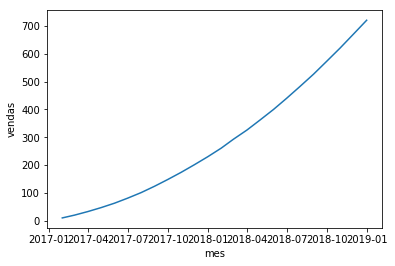

In [ ]:
sns.lineplot(x='mes', y='vendas', data=alucar)

## Aperfeiçoando o gráfico ( aula 1.2 )

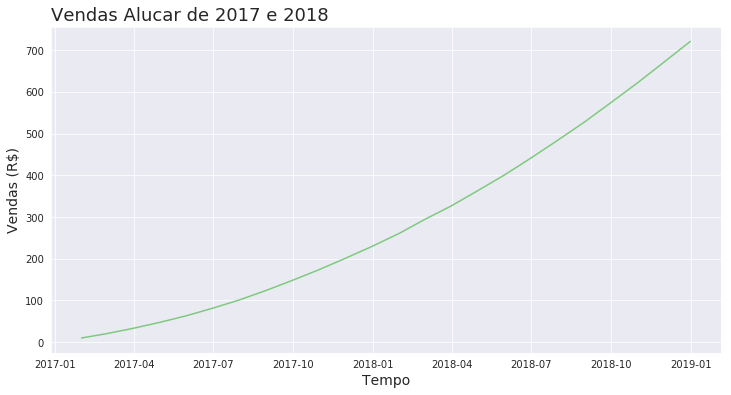

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax#esse gráfico aqui tá ficando pequeno lá no outro. ver se é por causa da versão do seaborn #tira aquele <matplot lib m123u1y2g3t1534>

# Decomposição e autocorrelação ( aula 2 )

## Decompondo as vendas ( aula 2.1 )

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


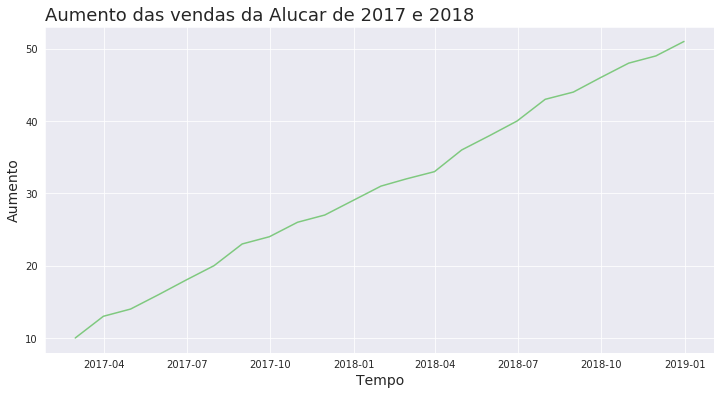

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

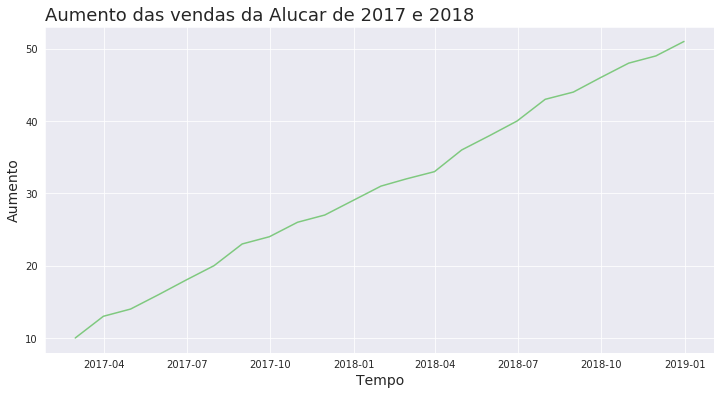

In [ ]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento',
      'mes', 'aumento', alucar)

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


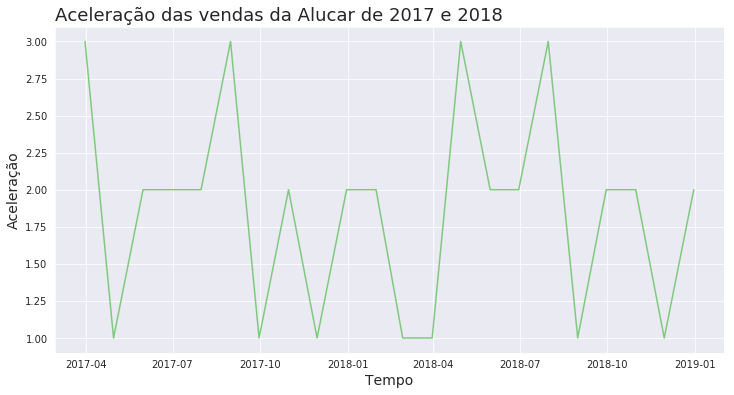

In [ ]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração',
      'mes', 'aceleracao', alucar)

## Observação e tendência ( aula 2.2 )

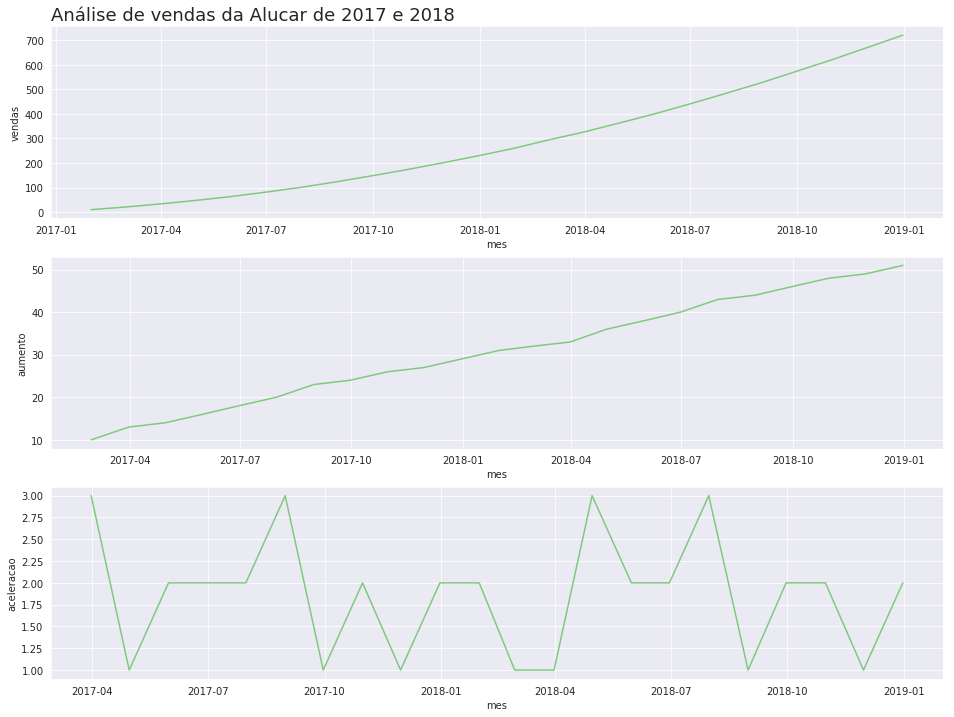

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18,loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18,loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
               alucar, 'Análise das vendas da Alucar de 2017 e 2018')

## Autocorrelação ( aula 2.3 )

In [ ]:
from pandas.plotting import autocorrelation_plot

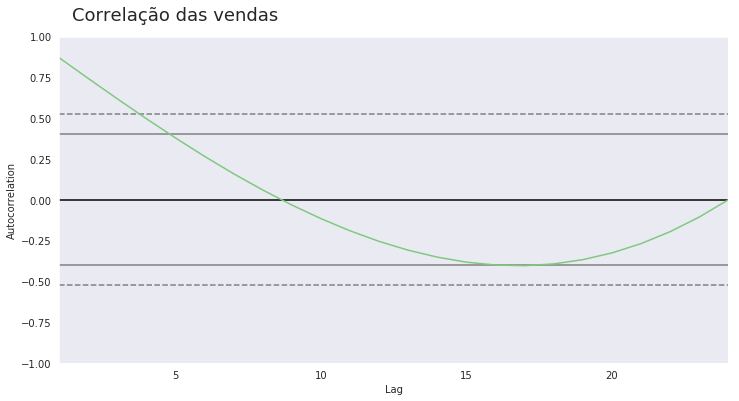

In [ ]:
#auto correlação é a medida de correlação de um valor com ele mesmo, dando passos (lag) e verificando a correlação.
# o valor máximo é 1 e o mínimo é 1
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax #percebemos que até o dia 7 +- a correlação é positiva, oq significa que os 7 primeiros dias estão correlacionados com a semana passada

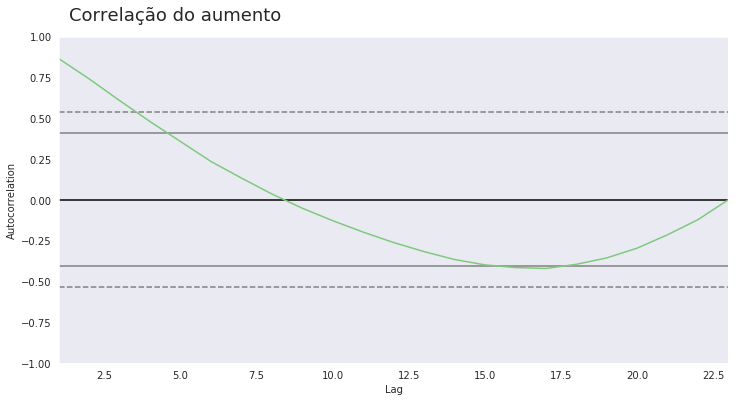

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:]) #começa no item 1, se não não aparece nada
ax = ax

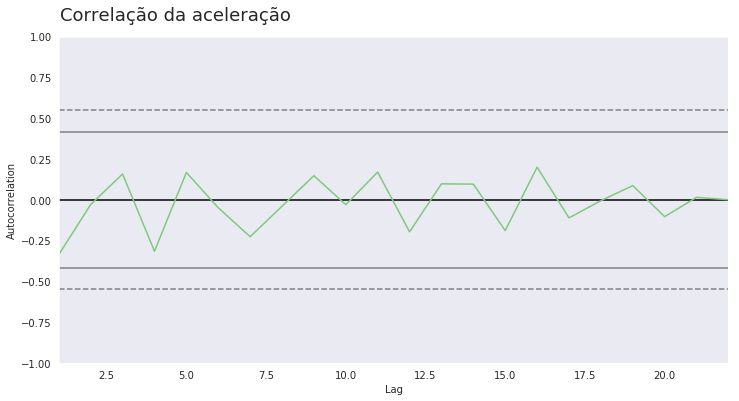

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])#começa no item 2
ax = ax

# Importância da decomposição e sazonalidade ( aula 3 )

## Analisando assinantes ( aula 3.1 )

In [ ]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


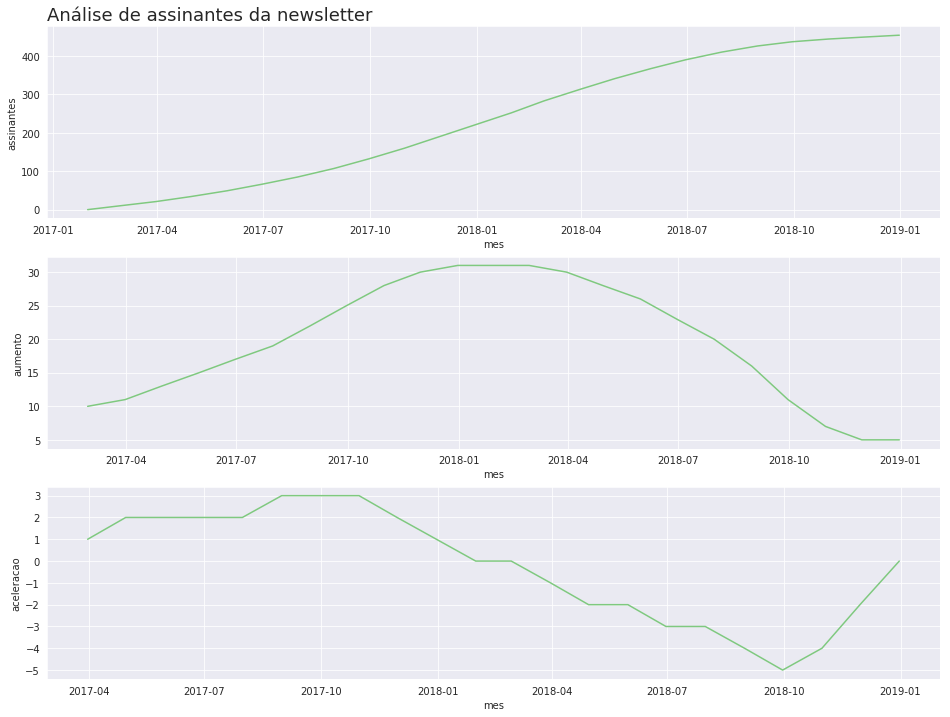

In [ ]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao',
                assinantes, 'Análise de assinantes da newsletter')

## Sazonalidade e chocolate ( aula 3.2 )

In [ ]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


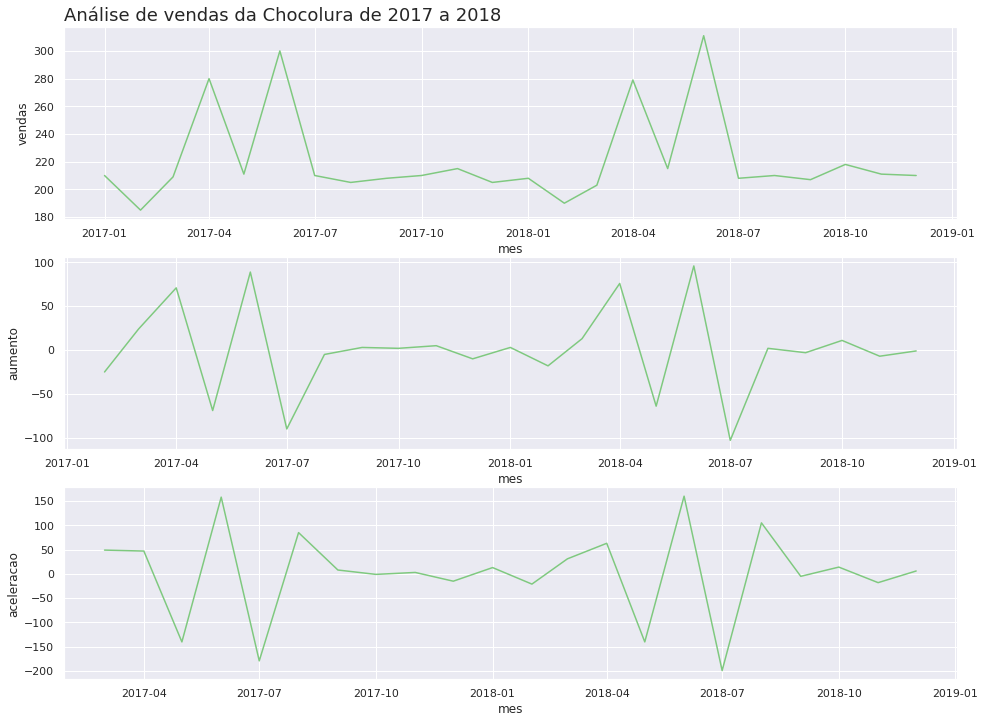

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

## Investigando a sazonalidade ( aula 3.3 )

In [ ]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

In [ ]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

In [ ]:
vendas_por_dia.dtypes

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


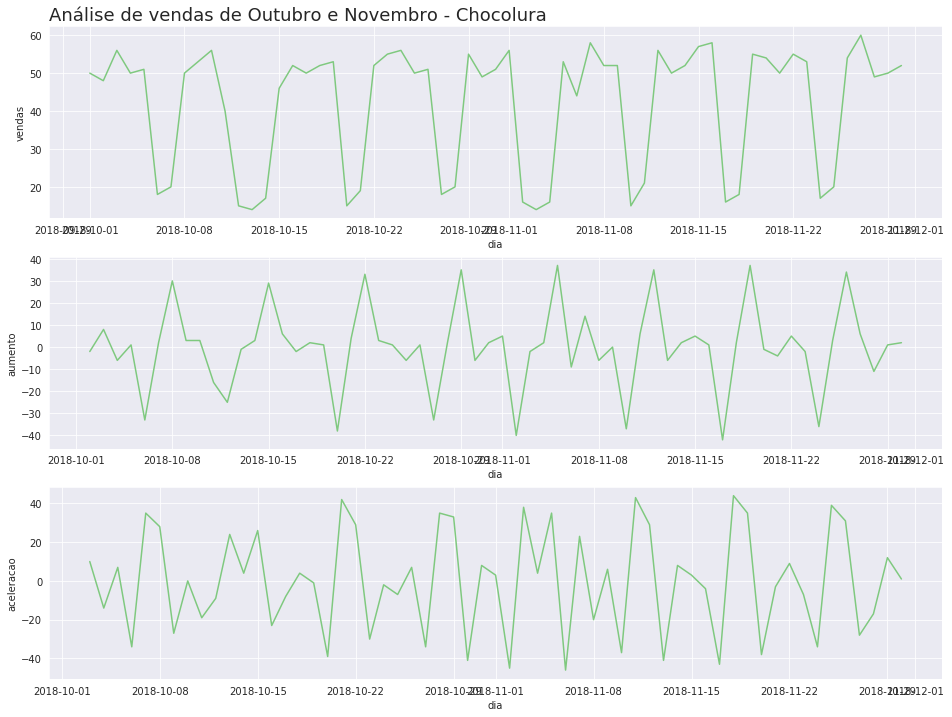

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
               vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

**Analisando a sazonalidade** 3.3

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday_name #Cria uma variável de acordo com o dia, usando o dt.weekday_name

In [ ]:
vendas_por_dia[:3]

In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta',#traduzindo
                   'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [ ]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round() ######MUITO IMPORTANTE

In [ ]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


# Normalização e Statsmodels ( aula 4 )


## Autocorrelação das vendas ( aula 4.1 )

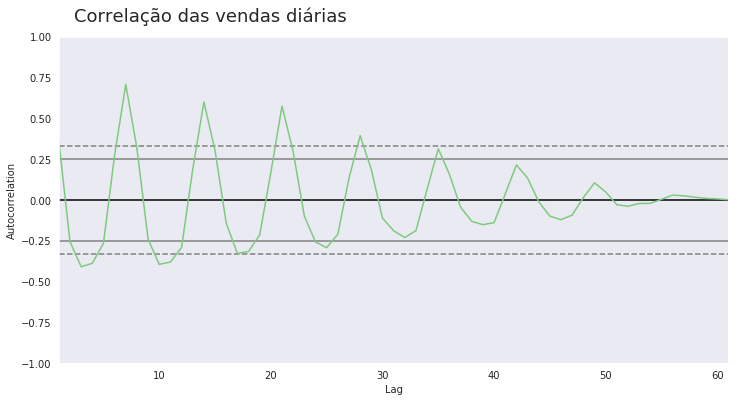

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

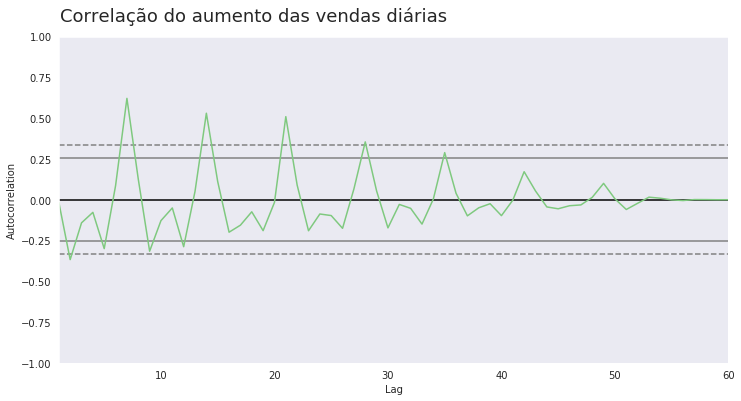

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

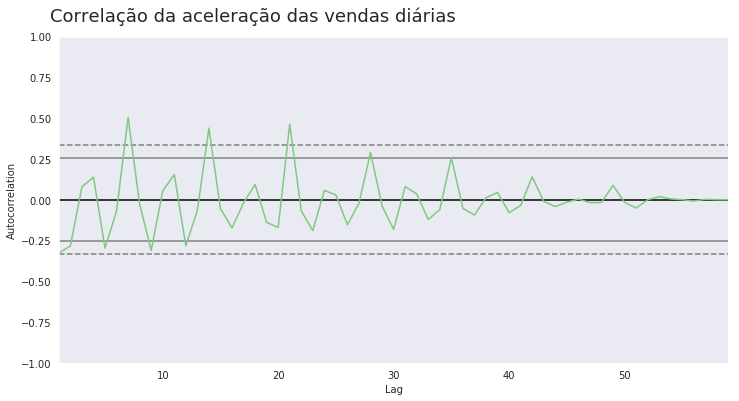

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

## Normalização (4.2)

In [ ]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


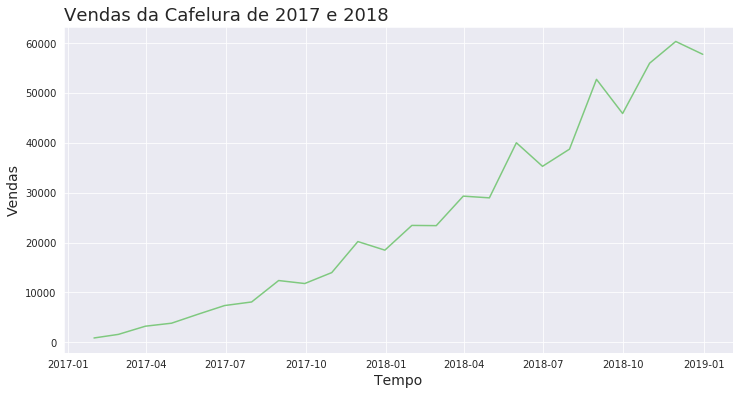

In [ ]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas',
      'mes', 'vendas', cafelura)

In [ ]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


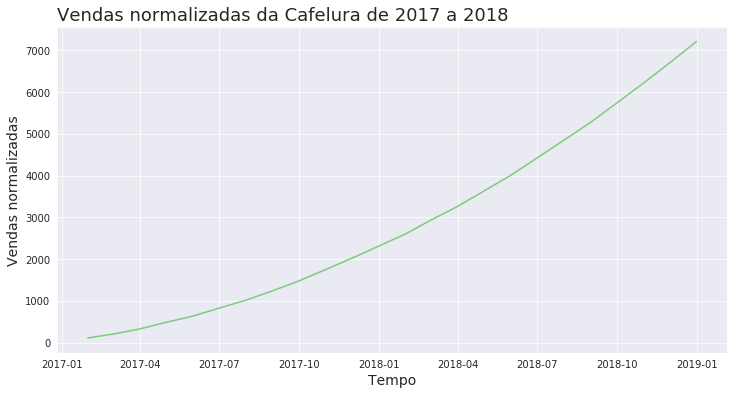

In [ ]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018',
      'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas',
      cafelura)

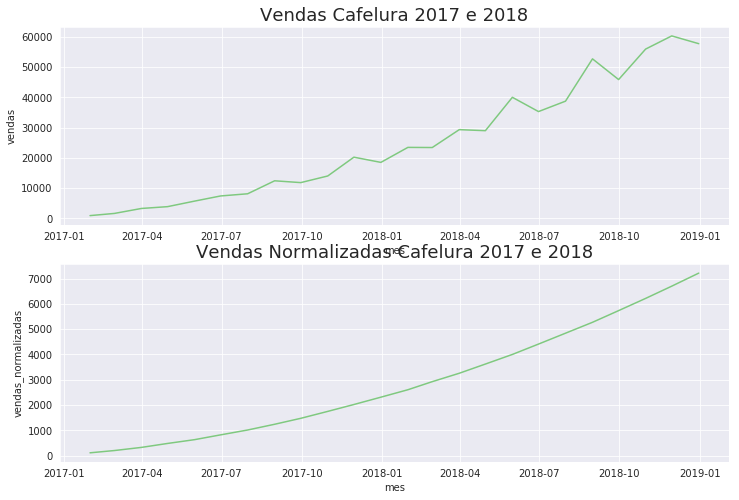

In [ ]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

## Statsmodels (4.3)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

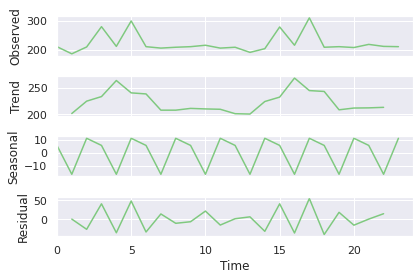

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3,)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


ValueError: ignored

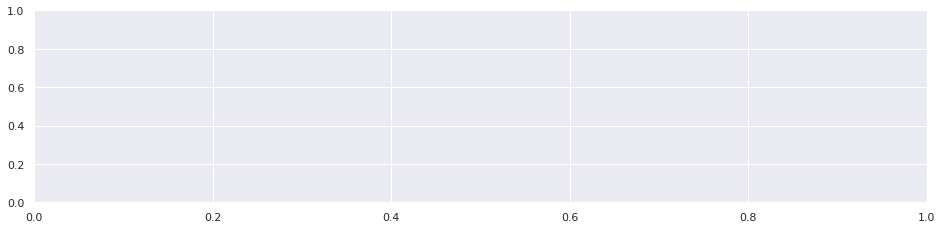

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado,
               'Exemplo de Statsmodels')

# Ruídos e média móvel ( aula 5 )

## Ruído de uma time series ( aula 5.1 )

In [ ]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


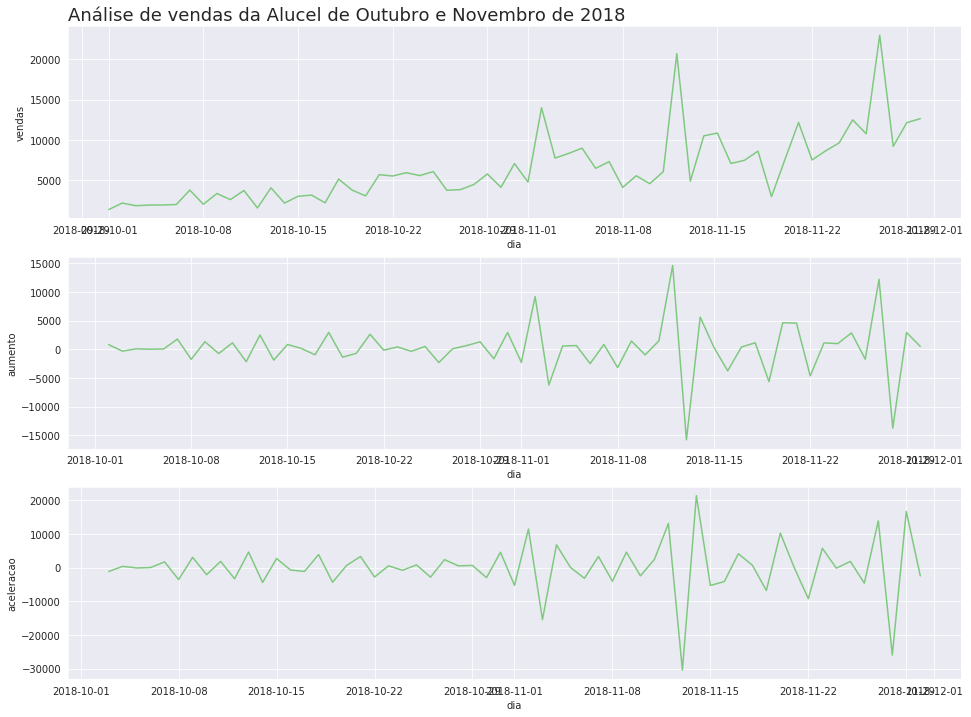

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

## Média móvel ( aula 5.2 )

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [ ]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


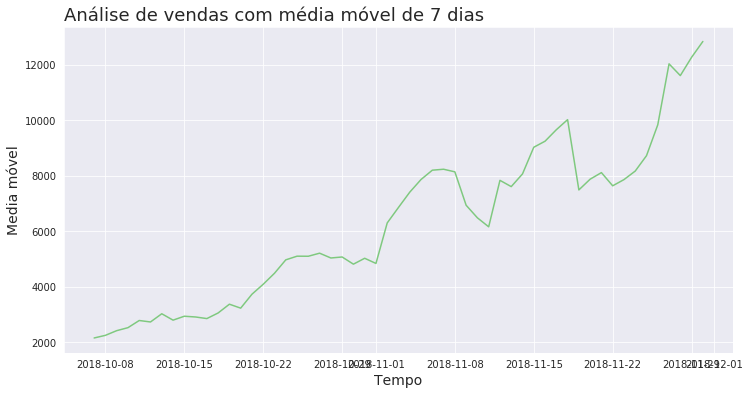

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias',
      'Tempo', 'Media móvel', 'dia', 'media_movel', alucel)

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

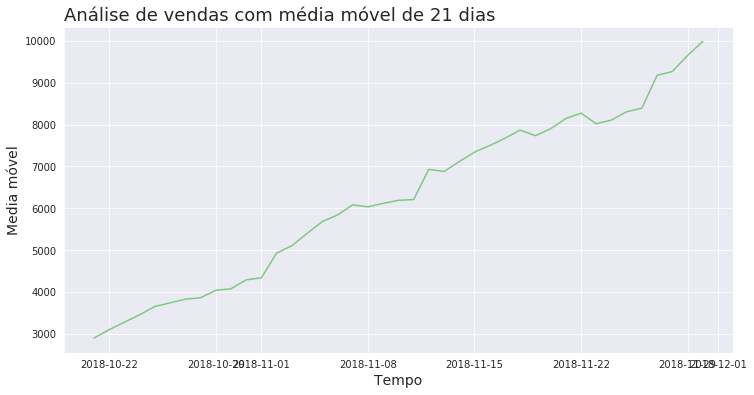

In [ ]:
plotar('Análise de vendas com média móvel de 21 dias',
      'Tempo', 'Media móvel', 'dia', 'media_movel_21', alucel)

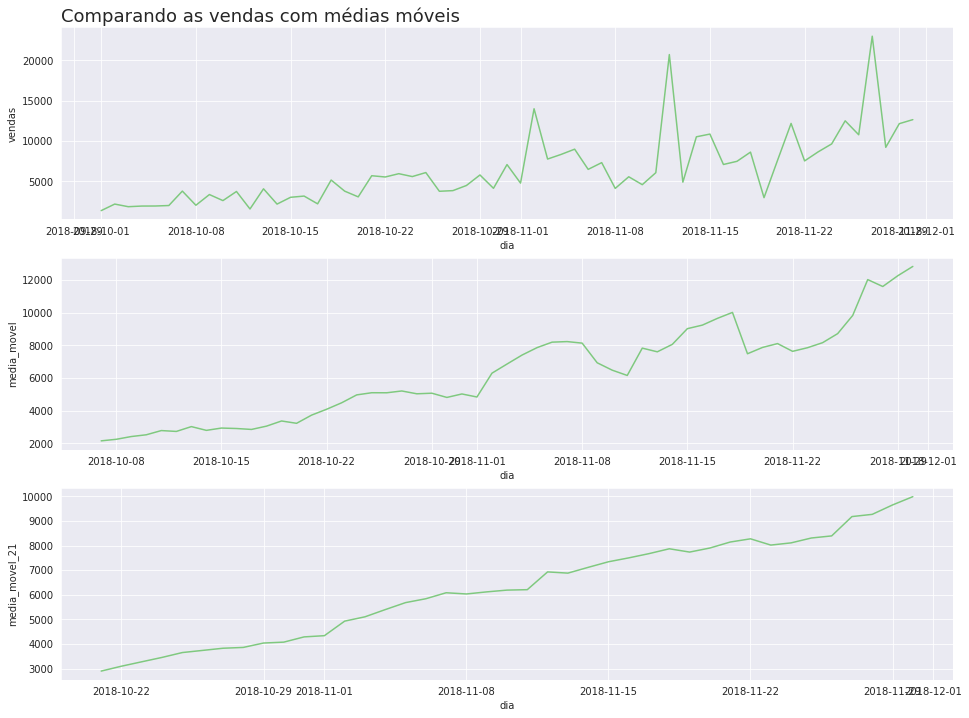

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',
               alucel, 'Comparando as vendas com médias móveis')

# Estudo Consumo de Gás

## Import

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Gas_consumption.csv')

In [ ]:
df.columns = ['entidade','codigo','ano','consumo']

In [ ]:
del df['codigo']

In [ ]:
df_br = df[df['entidade'] == 'Brazil']

In [ ]:
del df_br['entidade']

## Aumento e Aceleração

In [ ]:
df_br['aumento'] = df_br['consumo'].diff()
df_br['aceleracao'] = df_br['aumento'].diff()

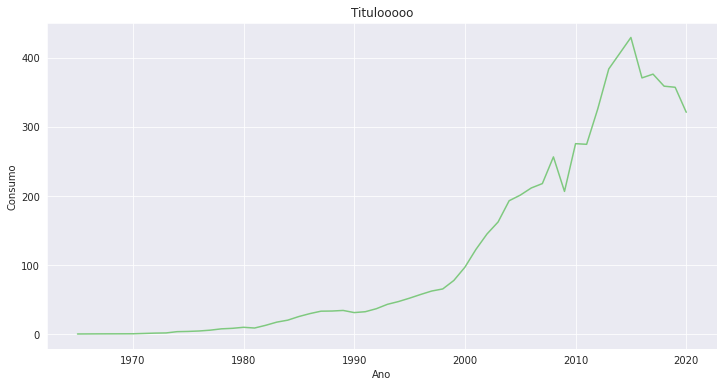

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='ano',y='consumo',data=df_br)
ax.set_title('Titulooooo')
ax.set_xlabel('Ano')
ax.set_ylabel('Consumo')
ax.figure.set_size_inches(12,6)

In [ ]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
  plt.figure(figsize=(16,12))
  ax=plt.subplot(3,1,1)
  ax.set_title(titulo,fontsize = 18, loc = 'left')
  sns.lineplot(x=x,y=y1,data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x,y=y2,data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x,y=y3,data=dataset)
  ax = ax

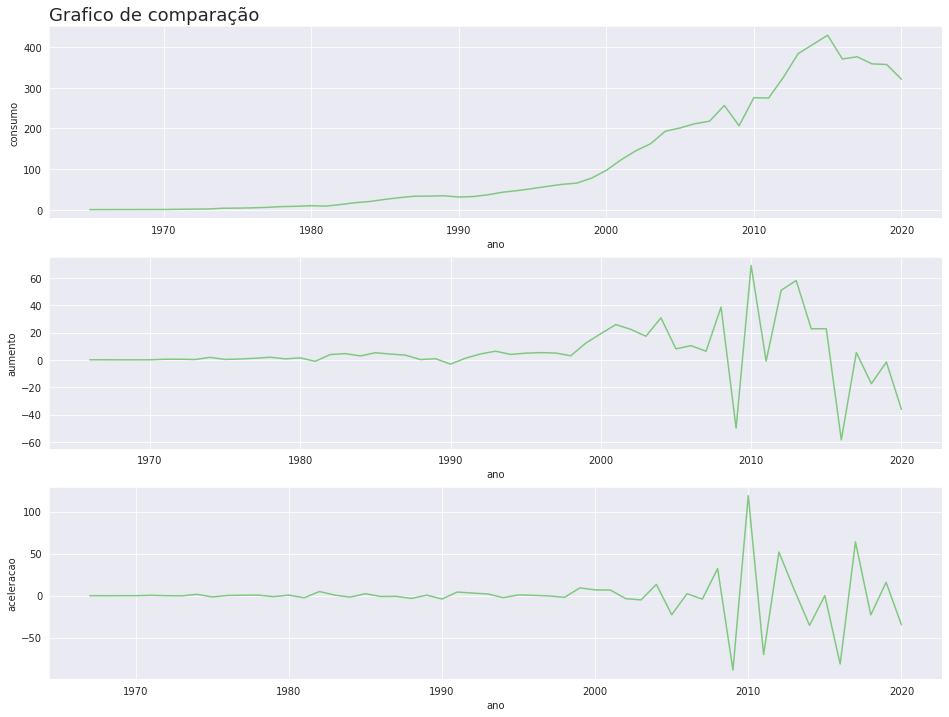

In [ ]:
plotar_3('ano','consumo','aumento','aceleracao',df_br,'Grafico de comparação')

## Statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose([df_br['consumo']],freq =3,)

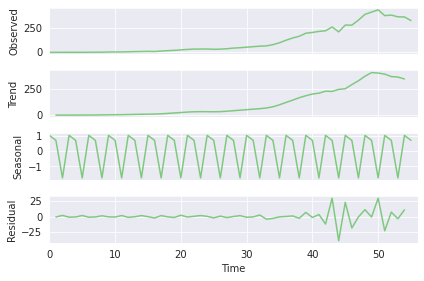

In [ ]:
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,0.513422,NaN,1.035801,NaN
1,0.600403,0.597513,0.711233,-0.708344
2,0.678716,0.665469,-1.747034,1.760281
3,0.717290,0.717324,1.035801,-1.035835
4,0.755965,0.761422,0.711233,-0.716691


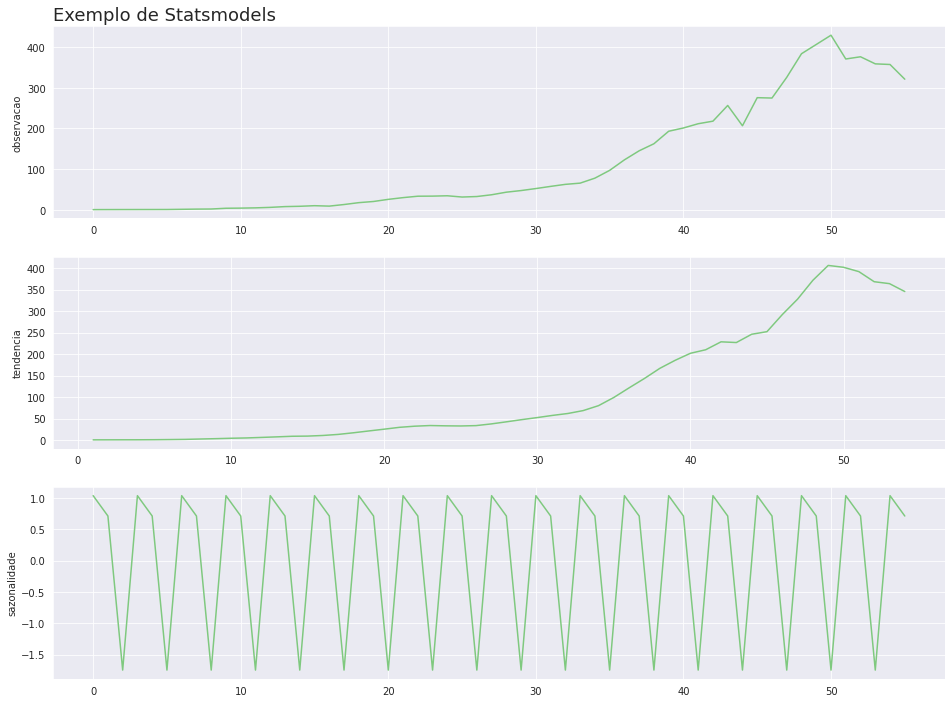

In [ ]:
plotar_3(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado,
               'Exemplo de Statsmodels')

## Média móvel

In [ ]:
df_br['media_movel'] = df_br['consumo'].rolling(7).mean()
df_br['media_movel_21'] = df_br['consumo'].rolling(21).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


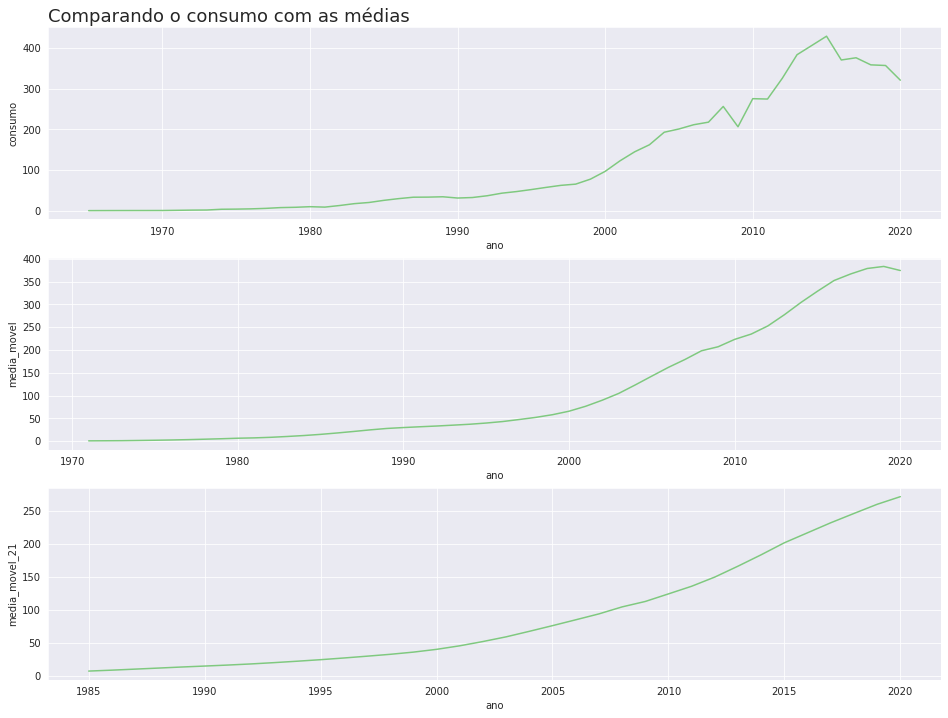

In [ ]:
plot_comparacao('ano','consumo', 'media_movel','media_movel_21',df_br,'Comparando o consumo com as médias')

# Estudo Devastação Amazônia

## Importando/ajeitando

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('amazonia2004-2019.csv')

In [ ]:
dados.columns = ['ano', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO',
       'total']
dados[:3]

,ano,AC,AM,AP,MA,MT,PA,RO,RR,TO,total
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286


## Aumento e aceleração

In [ ]:
dados['aumento']=dados['total'].diff()
dados['aceleracao']=dados['aumento'].diff()

In [ ]:
sns.set_theme(style = 'darkgrid', palette = 'Accent')

In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18,loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

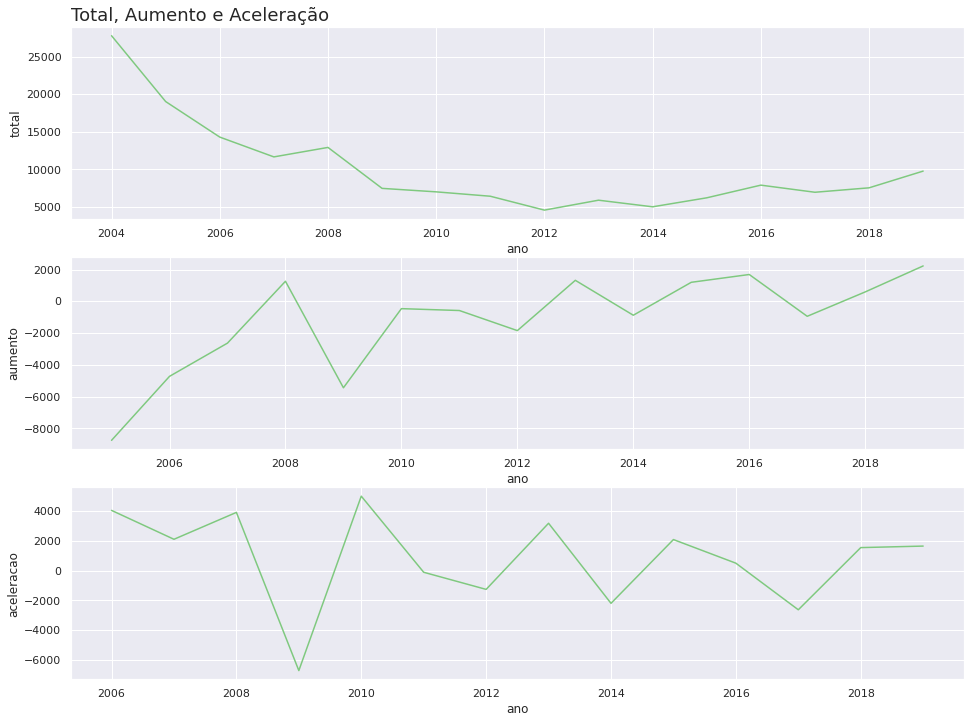

In [ ]:
plot_comparacao('ano','total','aumento','aceleracao',dados,'Total, Aumento e Aceleração')

## Statsmodels - seasonal_decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


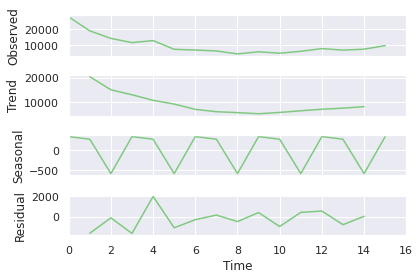

In [ ]:
resultado = seasonal_decompose([dados['total']], freq=3,)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,27772,NaN,326.066667,NaN
1,19014,20357.333333,260.433333,-1603.766667
2,14286,14983.666667,-586.500000,-111.166667
3,11651,12949.333333,326.066667,-1624.400000
4,12911,10675.333333,260.433333,1975.233333


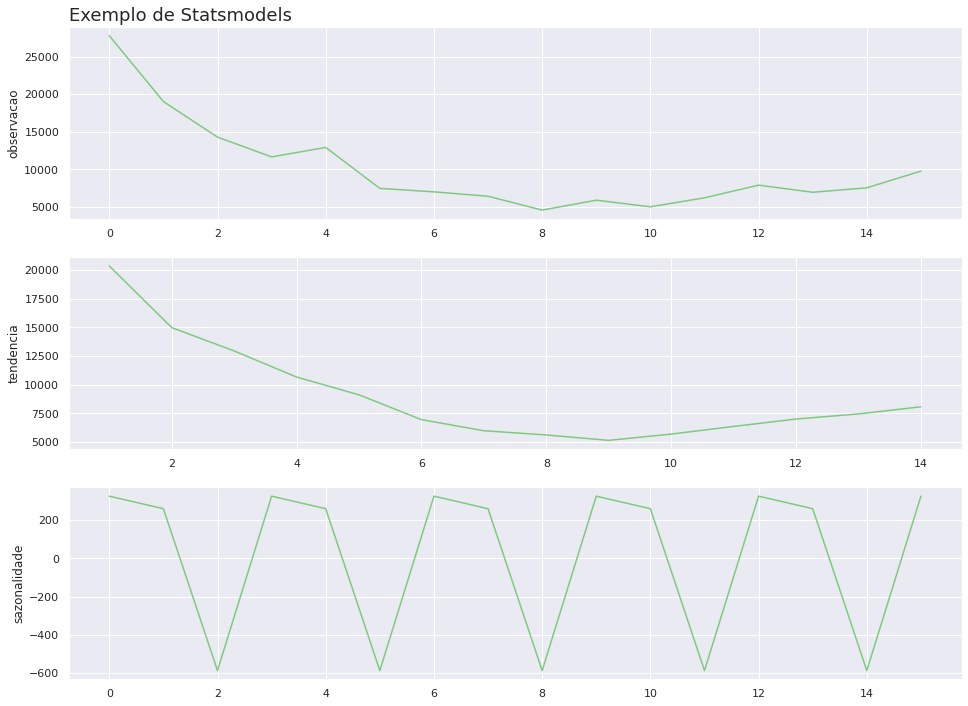

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade',  resultado ,'Exemplo de Statsmodels')

## média móvel

In [ ]:
dados['total_3anos'] = dados['total'].rolling(3).mean()
dados['total_7anos'] = dados['total'].rolling(7).mean()#não tem número suficiente kakakak

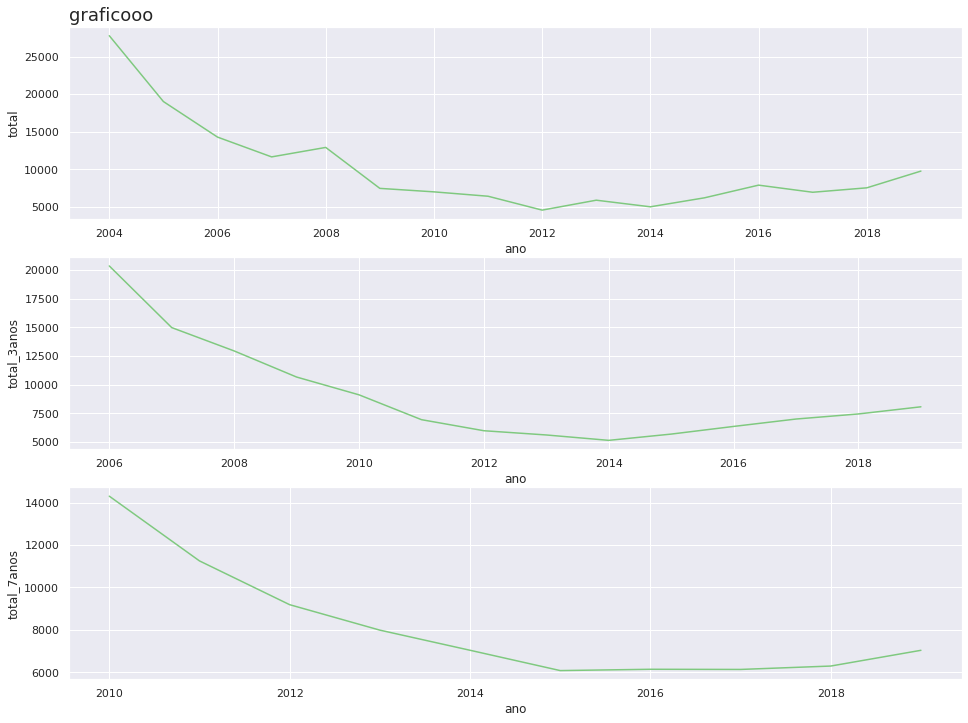

In [ ]:
plot_comparacao('ano','total','total_3anos','total_7anos', dados,'graficooo')

# Estudo População indonésia

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('indonesia_population.csv')

In [ ]:
dados = df[['Year','Population']]
dados[:3]

,Year,Population
0,2020,273523615
1,2019,270625568
2,2018,267670543


##Aumento/aceleracao

In [ ]:
dados[:3]

,Year,Population
0,2020,273523615
1,2019,270625568
2,2018,267670543


In [ ]:
dados_ordenado = dados.sort_values(by = 'Year') #ir do ano mais antigo para o mais recente

In [ ]:
dados_ordenado['aumento']=dados_ordenado['Population'].diff()
dados_ordenado['aceleracao']=dados_ordenado['aumento'].diff()

In [ ]:
dados_ordenado[:3]

,Year,Population,aumento,aceleracao
17,1955,77273425,NaN,NaN
16,1960,87751068,10477643.0,NaN
15,1965,100267062,12515994.0,2038351.0


In [ ]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize = 18,loc = 'left')
  sns.lineplot(x=x,y=y1,data = dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x,y=y2,data = dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x,y=y3,data = dataset)
  ax = ax

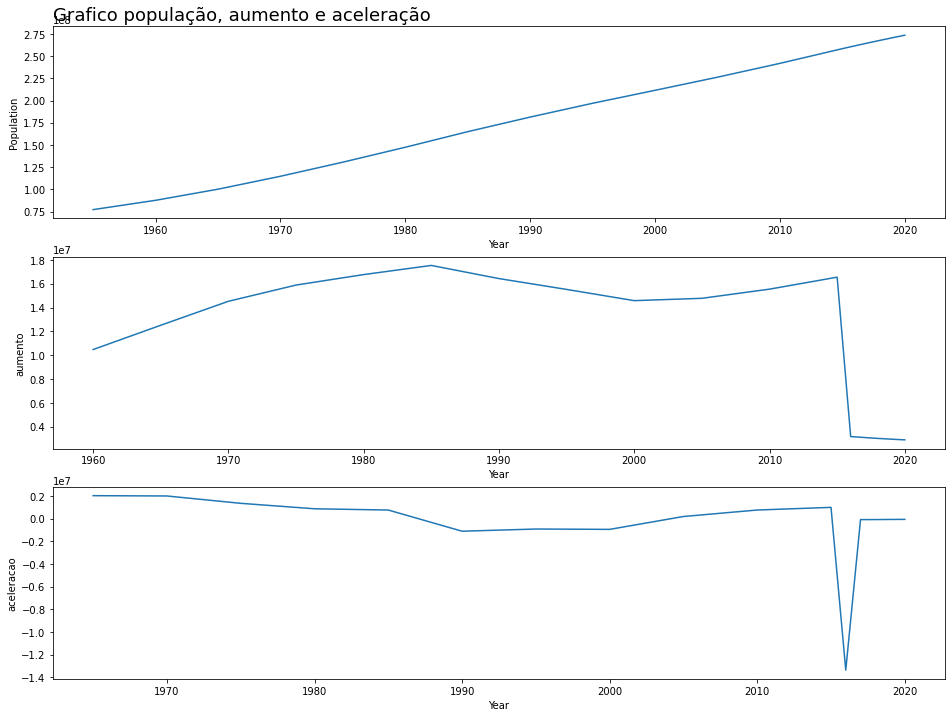

In [ ]:
plot_comparacao('Year','Population', 'aumento','aceleracao',dados_ordenado,'Grafico população, aumento e aceleração')

## Statsmodels - seazonal decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
resultado = seasonal_decompose(dados_ordenado['Population'],freq = 3,)

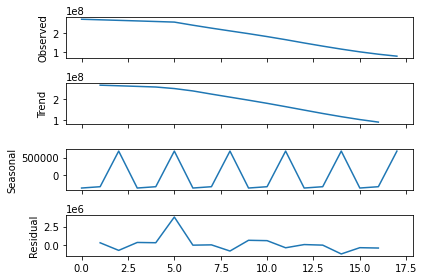

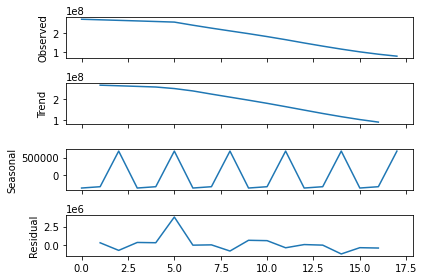

In [ ]:
ax = resultado.plot()
ax

In [ ]:
observacao = resultado.observed
ruido = resultado.resid
tendencia = resultado.trend
sazonalidade = resultado.seasonal

In [ ]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
17,77273425,NaN,687556.122222,NaN
16,87751068,8.843052e+07,-324962.577778,-3.544878e+05
15,100267062,1.009371e+08,-362593.544444,-3.074471e+05
14,114793178,1.152470e+08,687556.122222,-1.141367e+06
13,130680727,1.309739e+08,-324962.577778,3.177591e+04


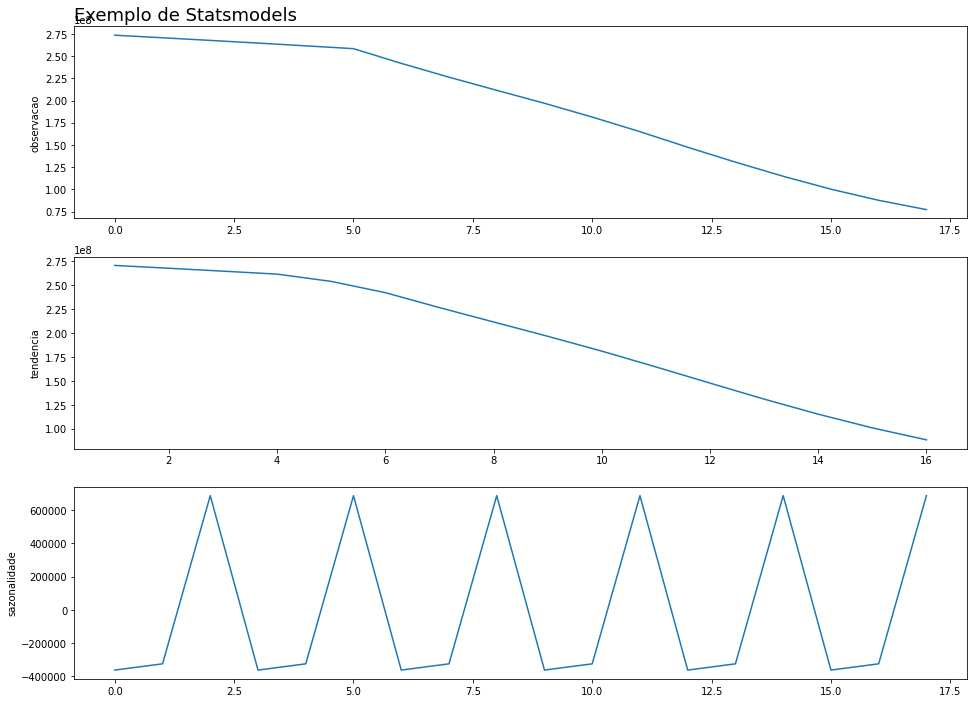

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade',  resultado ,'Exemplo de Statsmodels')